這個note是在簡介如何以scipy解簡單的微分方程。考慮的方程式是Lotka–Volterra equations：
\begin{eqnarray}
\frac{d}{dt} x &=& x(\alpha -\beta y)\\
\frac{d}{dt} y &=& y(\gamma -\delta y)\\
\end{eqnarray}
我們主要是以odeint對一階微分方程系統積分，在進入正題之前我們先引入需要的幾個模組，其中matplotlib是將最後得到的結果畫出來的模組最後得到的結果畫出來的模組，同時 "%matplotlib inline" 可以將圖嵌入ipython notebbok中；numpy則是數值計算需要的模組。

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

底下是主要程式，一開始我們先賦予參數值，接著定義一階微分方程系統
$$\frac{d}{dt} u =f(u,t)$$
定義方式是以 def 定義函數 $f(u,t)$，注意函數傳回值的部份"return [dxdt,dydt]"

在數值求解時，odeint需給予微分方程系統的函數予微分方程系統的函數(system)、初始值、初始值([x0,y0]))、以及欲解的時間點(t)。

In [2]:
alpha=0.1
beta=0.015
gamma=0.0225
delta=0.02
def system(z,t):
    x,y=z[0],z[1]
    dxdt= x*(alpha-beta*y)
    dydt=-y*(gamma-delta*x)
    return [dxdt,dydt]

t=np.linspace(0,300.,1000)
x0,y0=1.0,1.0
sol=odeint(system,[x0,y0],t)

底下是以matplotlib將得到的數值解匯出，首先是在相平面作圖：

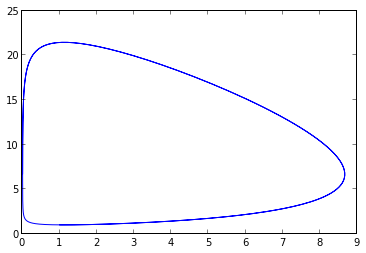

In [3]:
X,Y=sol[:,0],sol[:,1]
plt.plot(X,Y)
plt.show() 

底下是x、y對t作圖，其中x的圖形以紅色(r)表示，y的圖形以藍色(b)表示。

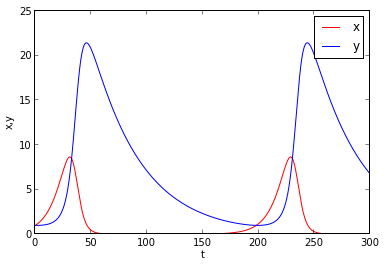

In [4]:
px, = plt.plot(t,X,'r-')
py, = plt.plot(t,Y,'b-')
plt.xlabel("t")   
plt.ylabel("x,y") 
plt.legend([px,py],["x","y"])
plt.show() 

底下是另一個簡單的例子

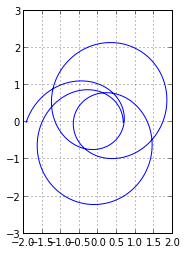

In [5]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pi = np.pi
sqrt = np.sqrt
cos = np.cos
sin = np.sin

def deriv_z(z, phi):
    u, udot = z
    return [udot, -u + sqrt(u)]

phi = np.linspace(0, 7.0*pi, 2000)
zinit = [1.49907, 0]
z = odeint(deriv_z, zinit, phi)
u, udot = z.T
# plt.plot(phi, u)
fig, ax = plt.subplots()
ax.plot(1/u*cos(phi), 1/u*sin(phi))
ax.set_aspect('equal')
plt.grid(True)
plt.show()

<li>SciPy-數值計算庫：http://myshare.dscloud.me/scipydoc/scipy_intro.html</li>
<li>繪圖指令請參考： http://onionys.blogspot.tw/2012/01/python-matplotlib.html</li>
<li>更多的matplotlib： http://nbviewer.ipython.org/github/c3h3/NCCU-PyData-Courses-2013Spring/blob/master/Lecture4/visualization/BasicMatplotlib.ipynb</li>